In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import functions

# mean monthly values

- TL
  - default land cover + 
  - 10% glaciers land cover+ 
- SL
  - mean annual default +
  - 25% default + 
  - 50% default + 
  - 75% default + 

In [6]:
%%time

column = 'Q100'
print(column)
result_df = pd.DataFrame()

# Define the path to your folders
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/1default_land_cover_mean_annual'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/2default_land_cover_25percent'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/3default_land_cover_50percent'
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/4default_land_cover_75percent'

# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]

# result_df2 = result_df.transpose()

# result_df.to_csv(folder_path + '/long_term_mean_monthly_Qstl_10percent_glacier.csv', index = False)
result_df.to_csv(folder_path + '/long_term_mean_monthly_Q100_default_landcover.csv', index = False)

Q100
CPU times: user 32.2 s, sys: 1.16 s, total: 33.4 s
Wall time: 34.6 s


# sum of Qs per for every month in the time-series


- TL
  - default land cover + 
  - 10% glaciers land cover +

- SL
  - mean annual
  - 25%
  - 50%
  - 75%

In [10]:
%%time

# columns = ['D', 'Q100', 'sc', 'Qstl', 'Qdftl']

column = 'Qstl'
print(column)
result_df = pd.DataFrame()

# Define the path to your folders
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover'

# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/1default_land_cover_mean_annual'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/2default_land_cover_25percent'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/3default_land_cover_50percent'
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/default_land_cover/4default_land_cover_75percent'



# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        sediments = pd.read_csv(file_path)
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield_all(sediments, column)
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]

# result_df2 = result_df.transpose()

# result_df.to_csv(folder_path + '/monthly_sum_Qstl_10percent_glacier.csv', index = False)
result_df.to_csv(folder_path + '/monthly_sum_Q100_default_landcover.csv', index = False)

# create a dataframe with timestep and attach it to the monthly data dataframe





Qstl
CPU times: user 29.8 s, sys: 757 ms, total: 30.5 s
Wall time: 30.8 s


In [17]:

# read one file to get the time-step
df = functions.calculate_monthly_sediment_yield_all(pd.read_csv(folder_path + '/cellnr12a/Sediment.out'), column)
df = df[['month', 'year']]


In [18]:
#read data 
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover'

monthly_data = pd.read_csv(folder_path + '/monthly_sum_Qstl_default_landcover.csv')
monthly_mean = pd.read_csv(folder_path + '/long_term_mean_monthly_Qstl_default_landcover.csv')

folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier'

gl_monthly_data = pd.read_csv(folder_path + '/monthly_sum_Qstl_10percent_glacier.csv')
gl_monthly_mean = pd.read_csv(folder_path + '/long_term_mean_monthly_Qstl_10percent_glacier.csv')


# sediment-limited 

# prepare data for plotting

In [19]:
# add elevation

elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_langtang.csv')[['cellnr2','band_data']] 
elevation = elevation.transpose()

elevation_list = elevation.loc['cellnr2'].tolist()

# --- 1) MONTHLY DATA
# reorder column in the monthly data so that they match the elevation file 

monthly_data = monthly_data[elevation_list]
gl_monthly_data = gl_monthly_data[elevation_list]

# check

if elevation_list == monthly_data.columns.tolist():
    print("default land cover. monthly data: same")
else:
    print("not the same")
    
if elevation_list == gl_monthly_data.columns.tolist():
    print("10% gl. monthly data: same")
else:
    print("not the same")

# --- 2) MONTHLY MEAN 
monthly_mean = monthly_mean[elevation_list]
gl_monthly_mean = gl_monthly_mean[elevation_list]

# check
if elevation_list == monthly_mean.columns.tolist():
    print("default land cover. monthly mean: same")
else:
    print("not the same")

if elevation_list == gl_monthly_mean.columns.tolist():
    print("10% glacier, monthly mean: same")
else:
    print("not the same")




default land cover. monthly data: same
10% gl. monthly data: same
default land cover. monthly mean: same
10% glacier, monthly mean: same


In [20]:
# change the column names to elevation values 

# 1) --- MONTHLY DATA

# rename columns according the the elevation and merge with timestep 
monthly_data.columns = elevation.loc['band_data']
monthly_data = pd.concat([df, monthly_data],axis=1)
monthly_data['land_cover'] = 'default'
# - 10% glacier
gl_monthly_data.columns = elevation.loc['band_data']
gl_monthly_data = pd.concat([df, gl_monthly_data],axis=1)
gl_monthly_data['land_cover'] ='10%glacier'




# 2) --- MONTHLY MEAN
monthly_mean.columns = elevation.loc['band_data']
# add month column
monthly_mean['month'] = monthly_mean.index.values + 1
monthly_mean['land_cover'] ='default'

gl_monthly_mean.columns = elevation.loc['band_data']
# add month column
gl_monthly_mean['month'] = gl_monthly_mean.index.values + 1
gl_monthly_mean['land_cover'] ='10%glacier'


In [21]:
# melt for plotting

# --- 1) monthly data 
melted_monthly = pd.melt(monthly_data, id_vars=['year', 'month','land_cover'], var_name='elevation', value_name='Qstl')
gl_melted_monthly = pd.melt(gl_monthly_data, id_vars=['year', 'month', 'land_cover'], var_name='elevation', value_name='Qstl')

# --- 2) 
melted_monthly_mean = pd.melt(monthly_mean, id_vars=['month','land_cover'], var_name='elevation', value_name='Qstl')
gl_melted_monthly_mean = pd.melt(gl_monthly_mean, id_vars=['month', 'land_cover'], var_name='elevation', value_name='Qstl')


# plotting

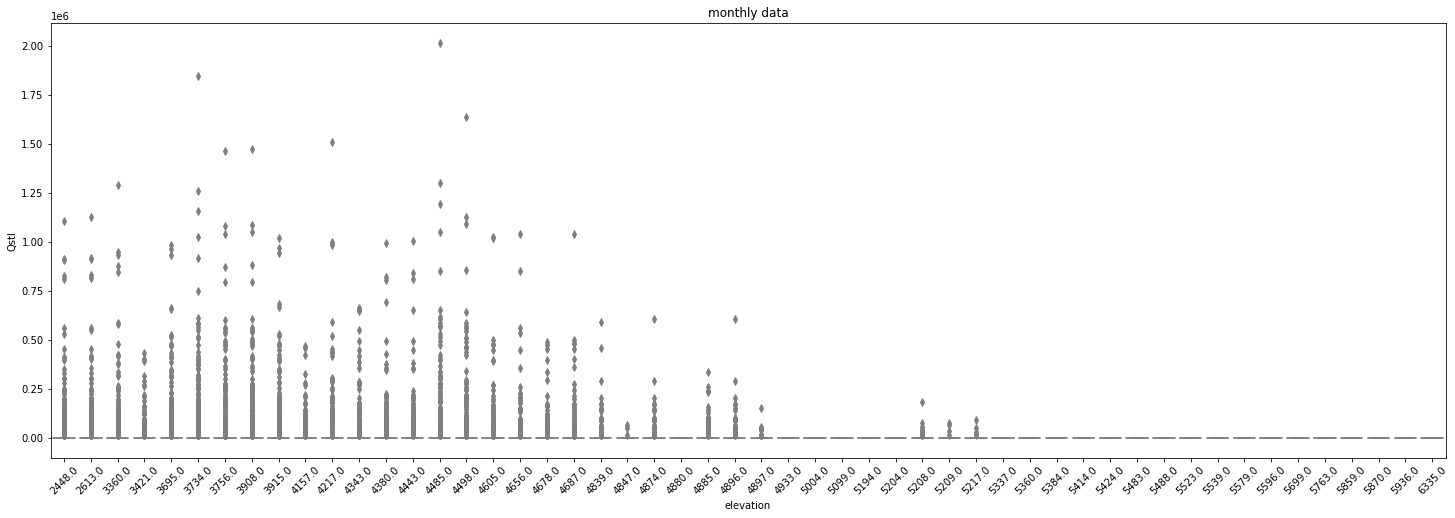

In [22]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation', y='Qstl', data=melted_monthly, color = 'lightgrey')
plt.title('monthly data')

plt.xticks(rotation=45)
plt.show()

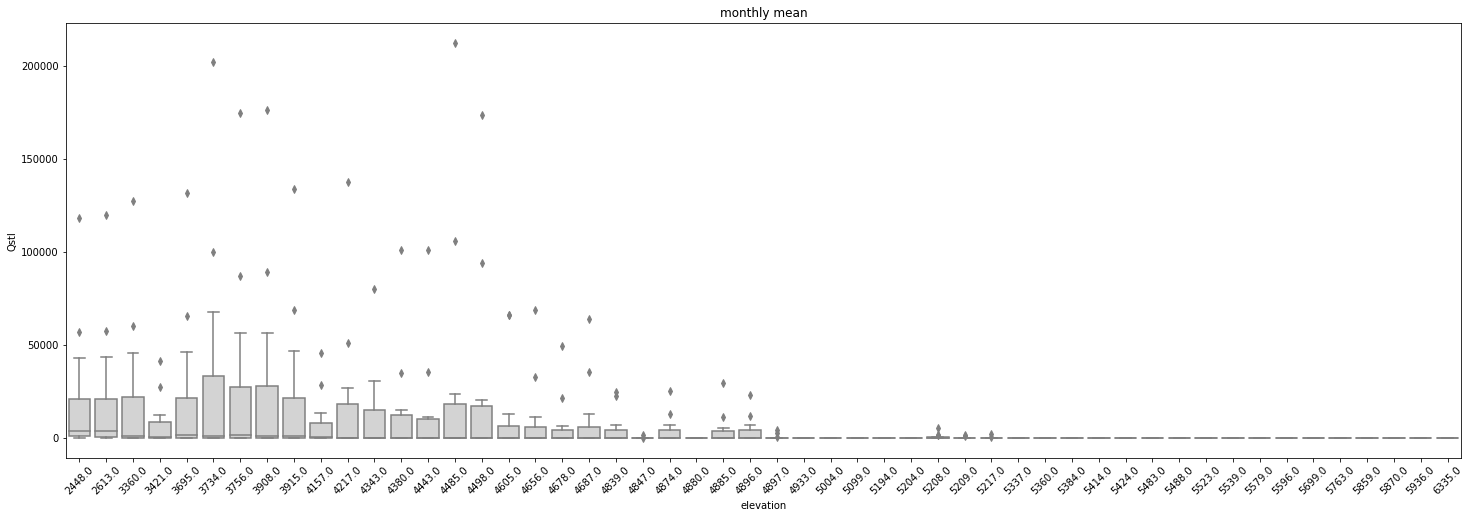

In [23]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation', y='Qstl', data=melted_monthly_mean, color = 'lightgrey')
plt.title('monthly mean')
plt.xticks(rotation=45)
plt.show()

# what if we remove zeros and then plot

In [24]:
melted_monthly_nozero = melted_monthly.replace(0,  np.nan)
melted_monthly_mean_nozero = melted_monthly_mean.replace(0,  np.nan)


In [25]:
melted_monthly_nozero_cut = melted_monthly_nozero[melted_monthly_nozero.elevation < 5300]

/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

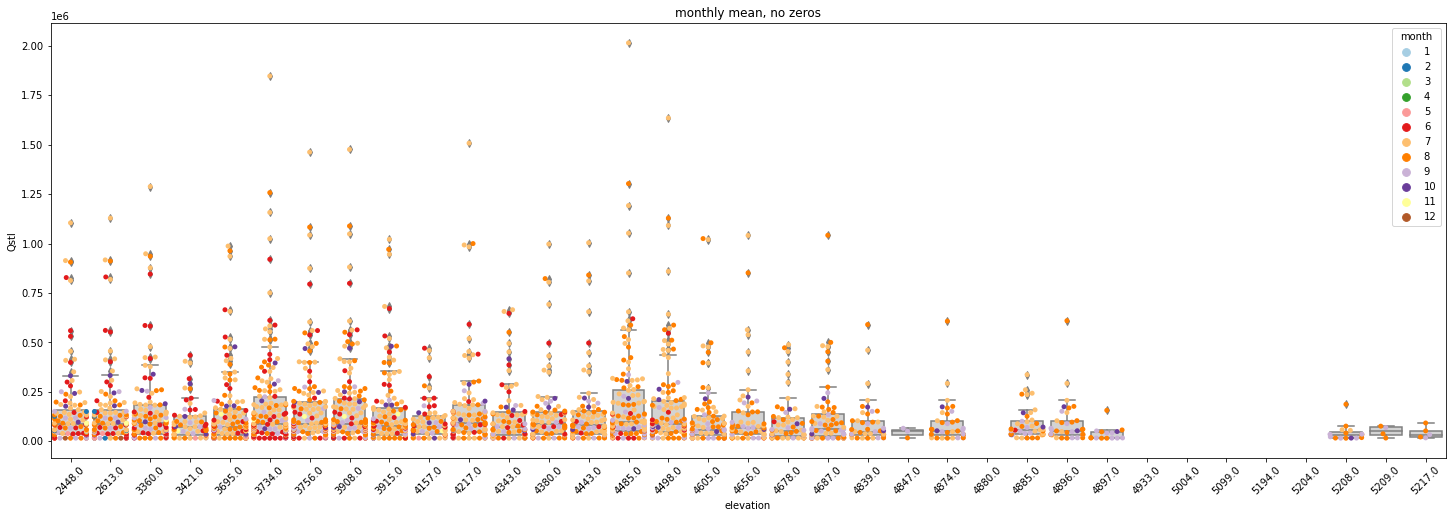

In [26]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation', y='Qstl', data=melted_monthly_nozero, color = 'lightgrey')
swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_nozero_cut, palette='Paired', s = 5)

plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()

/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


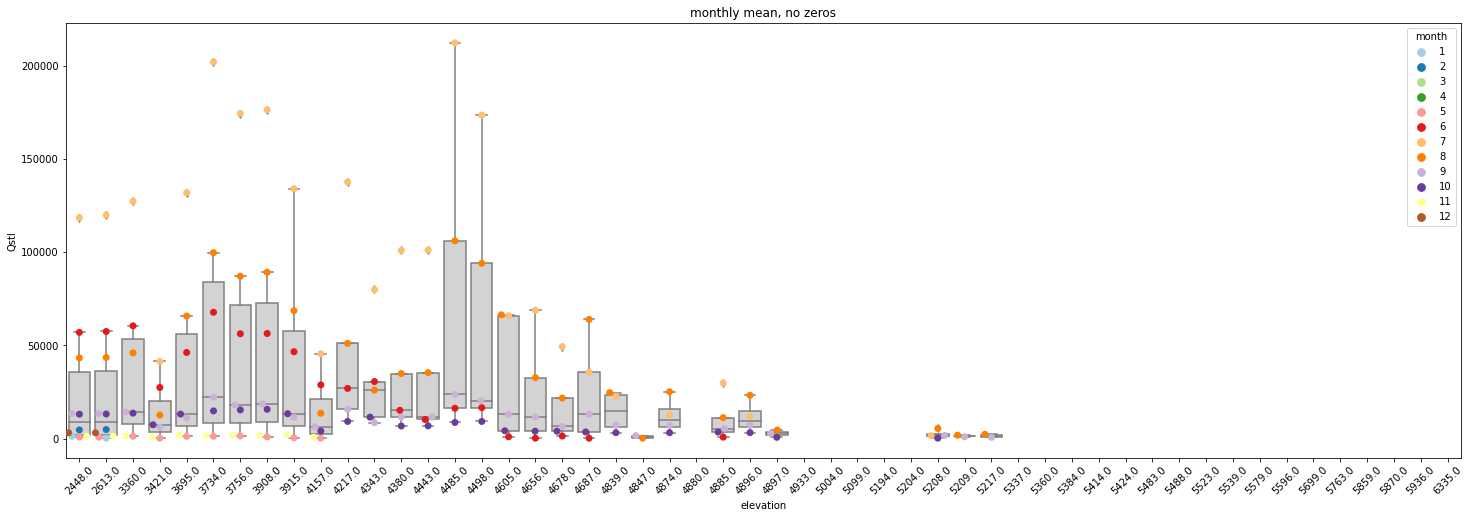

In [27]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation', y='Qstl', data=melted_monthly_mean_nozero, color = 'lightgrey')
swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_mean_nozero, palette='Paired', s = 7)
plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()

/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


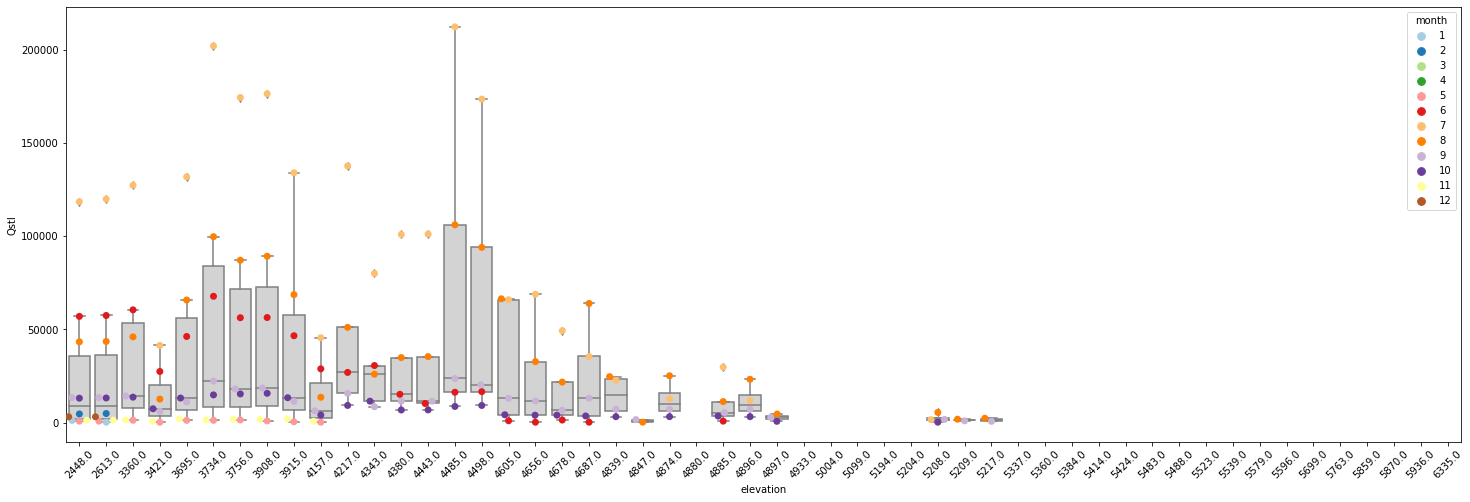

In [30]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation', y='Qstl', data=melted_monthly_mean_nozero, color = 'lightgrey')
swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_mean_nozero, palette='Paired', s = 7)
# plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()

# bin elevation

In [34]:
# melted_monthly

# import pandas as pd

def bin_elevation(row):
    if row['elevation'] <2500:
        return '<2500'
    elif 2500 <= row['elevation'] < 3000:
        return '2500 - 3000'
    elif 3000 <= row['elevation'] < 3500:
        return '3000 - 3500'
    elif 3500 <= row['elevation'] < 4000:
        return '3500 - 4000'
    elif 4000 <= row['elevation'] < 4500:
        return '4000 - 4500'
    elif 4500 <= row['elevation'] < 5000:
        return '4500 - 5000'
    elif 5000 <= row['elevation'] < 5500:
        return '5000 - 5500'
    elif 5500 <= row['elevation'] < 6000:
        return '5500 - 6000'
    elif 6000 <= row['elevation'] :
        return '>6000'



# # Assuming melted_monthly_nozero is your DataFrame
melted_monthly['elevation_bin'] = melted_monthly.apply(bin_elevation, axis=1)
melted_monthly_nozero = melted_monthly.replace(0, np.nan)

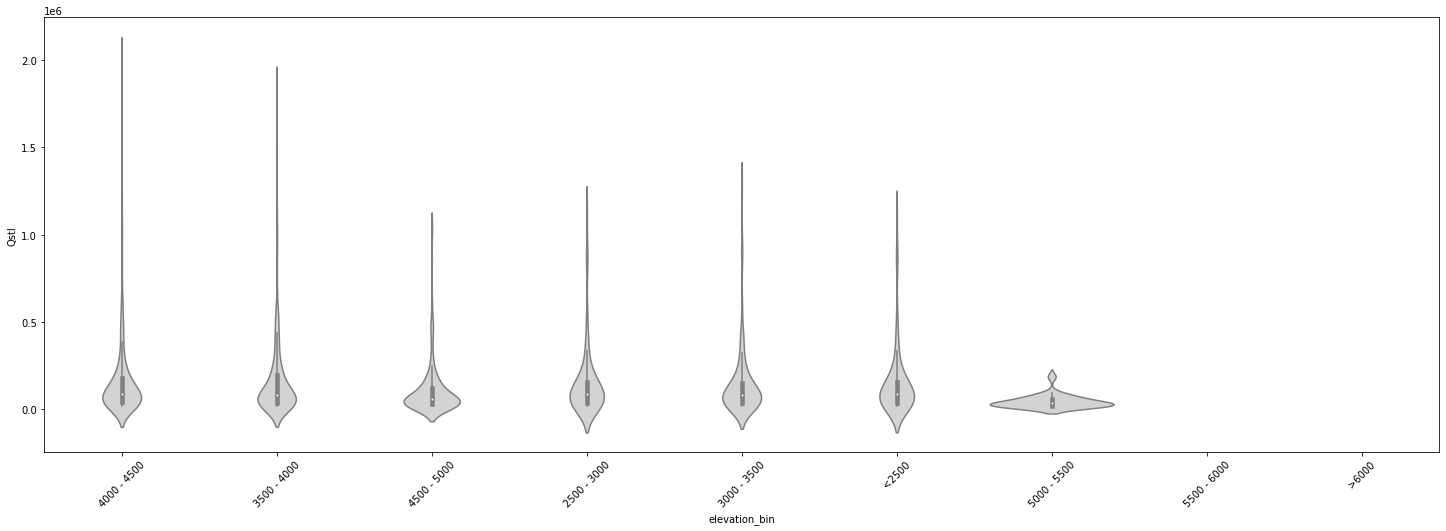

In [35]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.violinplot(x='elevation_bin', y='Qstl', data=melted_monthly_nozero, color = 'lightgrey')
# swarm = sns.swarmplot(x = 'elevation', y = 'Q100', hue = 'month', data = melted_monthly_mean_nozero, palette='Paired', s = 7)
# plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()

# plot together 2 types of land cover 

In [36]:
# all months together 
melted_monthly_together = melted_monthly.append(gl_melted_monthly, ignore_index = True)
melted_monthly_together = melted_monthly_together.replace(0, np.nan)


# long term average
melted_monthly_mean_together = melted_monthly_mean.append(gl_melted_monthly_mean, ignore_index = True)
melted_monthly_mean_together = melted_monthly_mean_together.replace(0, np.nan)


# binn elevation
# melted_monthly['elevation_bin'] = melted_monthly.apply(bin_elevation, axis=1)
melted_monthly_together['elevation_bin'] = melted_monthly_together.apply(bin_elevation, axis = 1)
melted_monthly_mean_together['elevation_bin'] = melted_monthly_mean_together.apply(bin_elevation, axis = 1)



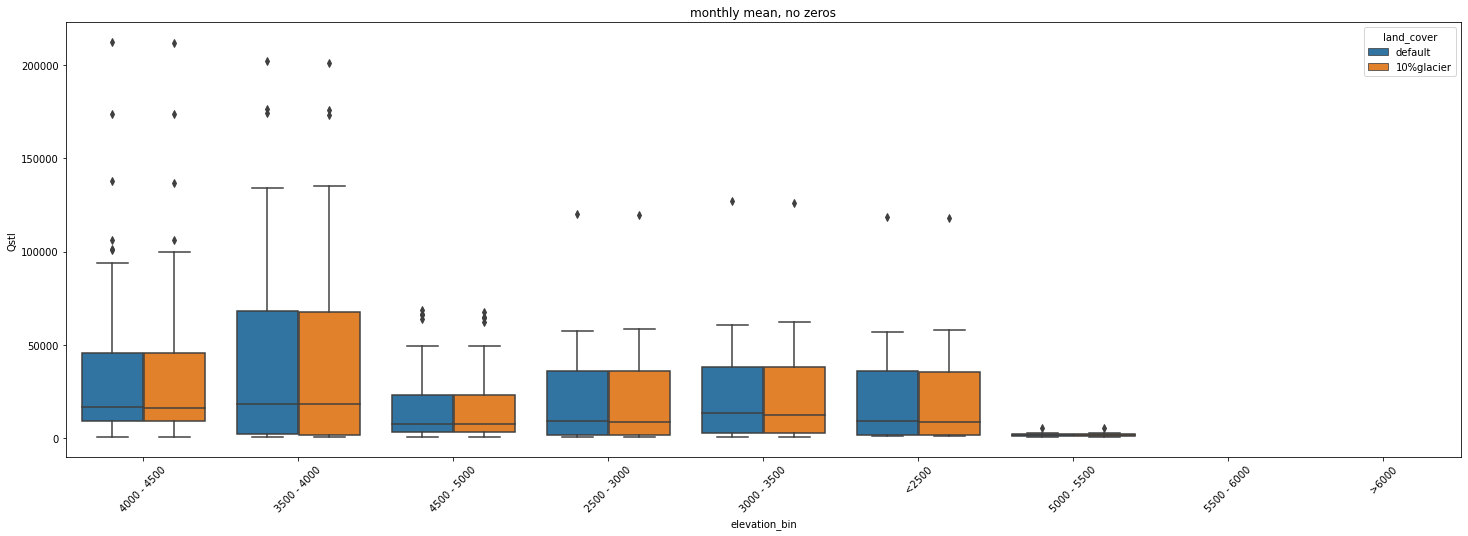

In [37]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation_bin', y='Qstl', hue = 'land_cover', data=melted_monthly_mean_together)#, color = 'grey')#, fill = False)#, gap = .1)
# swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_mean_together, palette='Paired', s = 7)
plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()

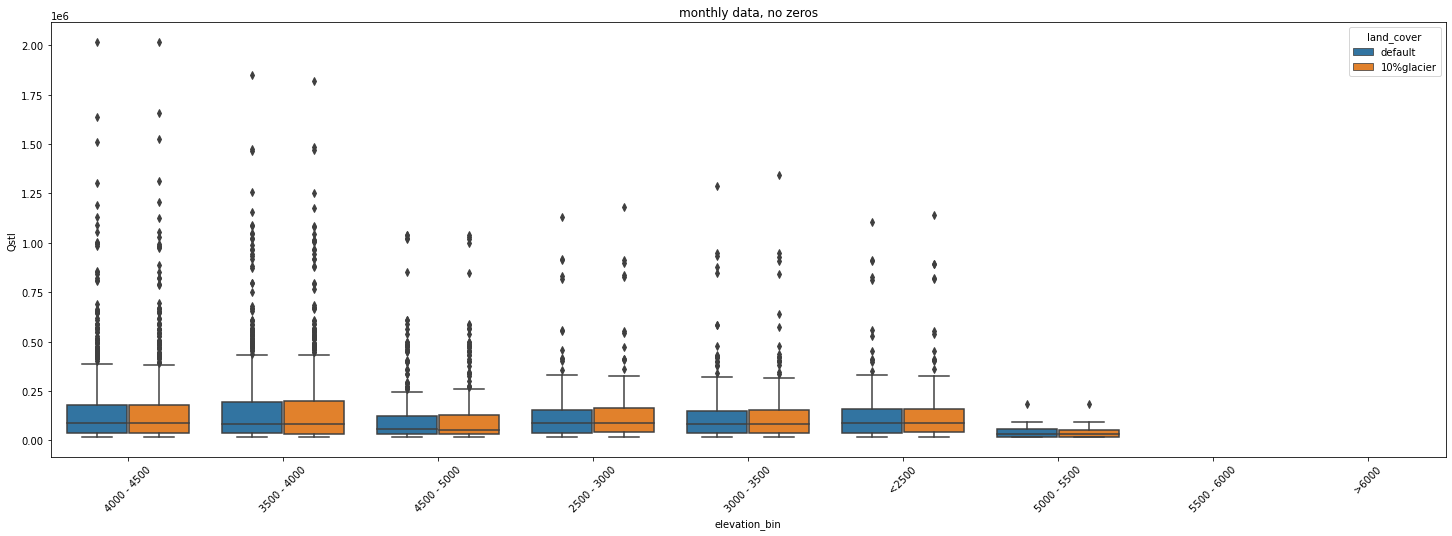

In [38]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='elevation_bin', y='Qstl', hue = 'land_cover', data=melted_monthly_together)#, color = 'grey')#, fill = False)#, gap = .1)
# swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_mean_together, palette='Paired', s = 7)
plt.title('monthly data, no zeros')
plt.xticks(rotation=45)
plt.show()

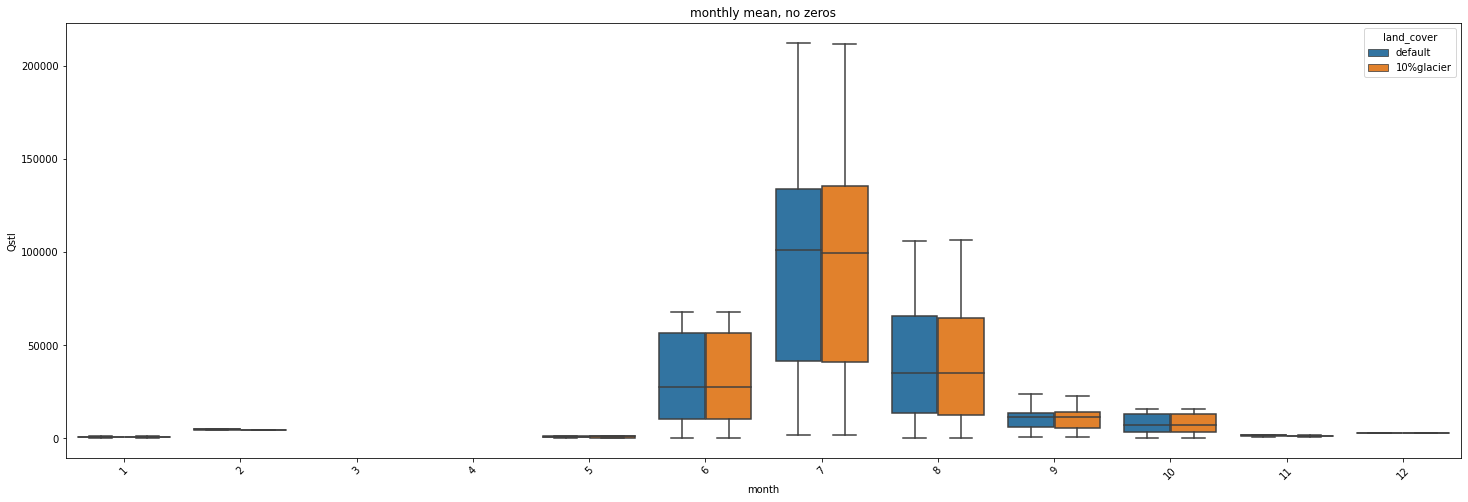

In [39]:
plt.figure(figsize=(25, 8))
# averaged over time mean monthly 
boxplots = sns.boxplot(x='month', y='Qstl', hue = 'land_cover', data=melted_monthly_mean_together)#, color = 'grey')#, fill = False)#, gap = .1)
# swarm = sns.swarmplot(x = 'elevation', y = 'Qstl', hue = 'month', data = melted_monthly_mean_together, palette='Paired', s = 7)
plt.title('monthly mean, no zeros')
plt.xticks(rotation=45)
plt.show()